In [1]:
import cv2 
import numpy as np 

In [2]:
import os
import matplotlib.pyplot as plt
import skimage as ski
from skimage import io
from skimage.color import rgb2gray

In [255]:
from typing import Optional, Tuple, Union, TypeVar, List
import numpy.typing as npt
import matplotlib.figure

In [4]:
from scipy.ndimage.filters import convolve

In [5]:
os.getcwd()

'C:\\Users\\rzamb\\Documents\\UMD\\640_Computer_Vision\\HW\\hw2\\Zambrano_Ricardo_ASN2_py'

**I took the opportunity of having short answer problem 2 to test if OpenCV would have the same output I had following the method taught in class. It did.** This is just me being curious and checking how theory connects with practice.

In [6]:
kernel = np.ones((1, 3), np.uint8) 
kernel

array([[1, 1, 1]], dtype=uint8)

In [7]:
kernel.shape

(1, 3)

In [8]:
img = np.array([[0,0,1,1,0,0,1,1]], dtype=np.uint8)
img

array([[0, 0, 1, 1, 0, 0, 1, 1]], dtype=uint8)

In [9]:
img.shape

(1, 8)

In [10]:
img_dilation = cv2.dilate(img, kernel, iterations=1) 
img_dilation

array([[0, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

### Problem 2

Loading the image

In [11]:
PATH_TOTORO = '..\Zambrano_Ricardo_ASN2_py\input_img_totoro.jpg'
PATH_CARACAS = '..\Zambrano_Ricardo_ASN2_py\input_img_caracas.jpg'        

In [12]:
# Loading the image
totoro = io.imread(PATH_TOTORO)
ccs = io.imread(PATH_CARACAS)

In [13]:
# Checking the type of the image matches the required dtype
totoro.dtype

dtype('uint8')

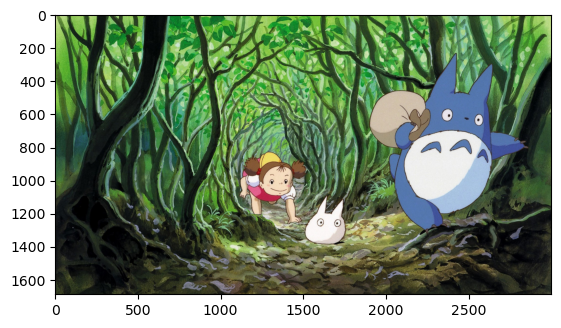

In [14]:
# Showing image used for the excercise
plt.imshow(totoro)
plt.show()

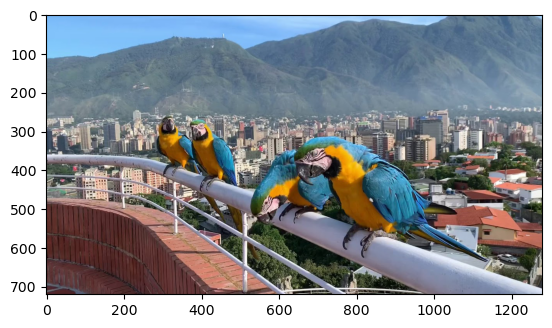

In [15]:
# Showing image used for the excercise
plt.imshow(ccs)
plt.show()

**Writing energy_image()**

The energy function is given by:

$$
e_{1}(I) = |\frac{\delta}{\delta x}I| + |\frac{\delta}{\delta x}|
$$

The image above has three channels. Thereby we need to build a derivative filter that will sweep each channel. For the derivative in each direction I will use the Scharr operator, which is more accurate than the Sobel operator.

In [16]:
# 2D version of the Scharr operator

filter_dy = np.array([
    [47.0, 162.0, 47.0],
    [0.0, 0.0, 0.0],
    [-47.0, -162.0, -47.0],
])

# This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
filter_dy = np.stack((filter_dy,filter_dy,filter_dy), axis=2)

filter_dy

array([[[  47.,   47.,   47.],
        [ 162.,  162.,  162.],
        [  47.,   47.,   47.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[ -47.,  -47.,  -47.],
        [-162., -162., -162.],
        [ -47.,  -47.,  -47.]]])

In [17]:
filter_dy[:,:,0]

array([[  47.,  162.,   47.],
       [   0.,    0.,    0.],
       [ -47., -162.,  -47.]])

In [18]:
# 2D version of the Scharr operator

filter_dx = np.array([
    [47.0, 0.0, -47.0],
    [162.0, 0.0, -162.0],
    [47.0, 0.0, -47.0],
])

# This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
filter_dx = np.stack((filter_dx,filter_dx,filter_dx), axis=2)

filter_dx

array([[[  47.,   47.,   47.],
        [   0.,    0.,    0.],
        [ -47.,  -47.,  -47.]],

       [[ 162.,  162.,  162.],
        [   0.,    0.,    0.],
        [-162., -162., -162.]],

       [[  47.,   47.,   47.],
        [   0.,    0.,    0.],
        [ -47.,  -47.,  -47.]]])

In [19]:
filter_dx[:,:,2]

array([[  47.,    0.,  -47.],
       [ 162.,    0., -162.],
       [  47.,    0.,  -47.]])

To convolve the image I am using a scypy function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html

In [20]:
img = totoro.astype(np.double)
img.dtype

dtype('float64')

In [21]:
convolved_img = np.absolute(convolve(img, filter_dx)) + np.absolute(convolve(img, filter_dy))

# We sum the energies in the red, green, and blue channels
energy_map = convolved_img.sum(axis=2)

In [22]:
totoro.shape

(1688, 3000, 3)

In [23]:
energy_map.shape

(1688, 3000)

In [24]:
# Checking the output type meets HW's requirement
energy_map.dtype

dtype('float64')

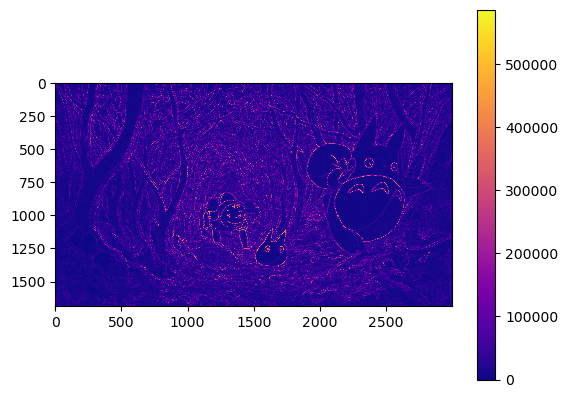

In [25]:
plt.imshow(energy_map, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

In [26]:
input_type = np.dtype(np.uint8)
output_type = np.dtype(np.double)

def energy_image(im: npt.NDArray[np.uint8]) -> npt.NDArray[np.double]:
    """
    Input Arguments: 
        An image with dimmensions MxNx3 of data type uint8
    
    Output: 
        The result of passing the image to the energy function e_1(im) = |d(im)/dx| + |d(im)/dy|
        The partial derivatives operators use the optimal 8 bit integer valued 3x3 filter 
        stemming from Scharr's theory
    """
    assert im.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert im.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    
    ### Creating Partial Derivative Operators ###
    
    # 2D version of the Scharr operator
    filter_dy = np.array([
        [47.0, 162.0, 47.0],
        [0.0, 0.0, 0.0],
        [-47.0, -162.0, -47.0],
    ])

    # This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
    filter_dy = np.stack((filter_dy,filter_dy,filter_dy), axis=2)
    
    # 2D version of the Scharr operator
    filter_dx = np.array([
        [47.0, 0.0, -47.0],
        [162.0, 0.0, -162.0],
        [47.0, 0.0, -47.0],
    ])

    # This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
    filter_dx = np.stack((filter_dx,filter_dx,filter_dx), axis=2)

    ### Converting input into desired output data type ###
    img = im.astype(np.double)
    
    # Convolving the image to get the gradient on each channel
    convolved_img = np.absolute(convolve(img, filter_dx)) + np.absolute(convolve(img, filter_dy))

    # Adding the energies in the red, green, and blue channels
    energy_map = convolved_img.sum(axis=2)
    
    return energy_map

In [27]:
test_energy_map = energy_image(totoro)

In [28]:
test_energy_map

array([[ 2304., 26802., 14436., ..., 10188., 15308.,  8960.],
       [  846., 22428., 14436., ...,  8730., 13286., 11364.],
       [ 4608., 12132.,  7854., ...,  8370.,  8526.,  7680.],
       ...,
       [12978., 15282., 13824., ..., 35784., 35784., 22428.],
       [17586., 14436., 10062., ..., 10296., 10908., 23652.],
       [10674., 11286.,  1458., ...,  8370.,  9828.,  7524.]])

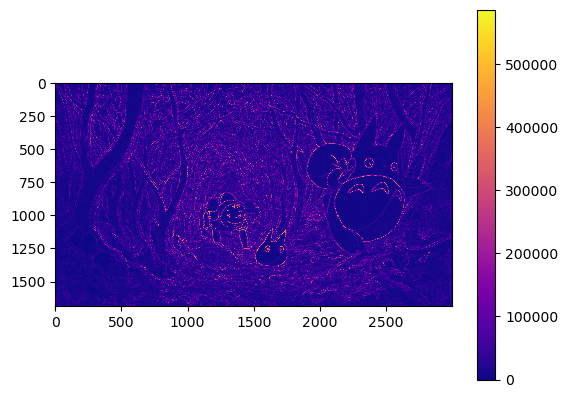

In [29]:
plt.imshow(test_energy_map, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

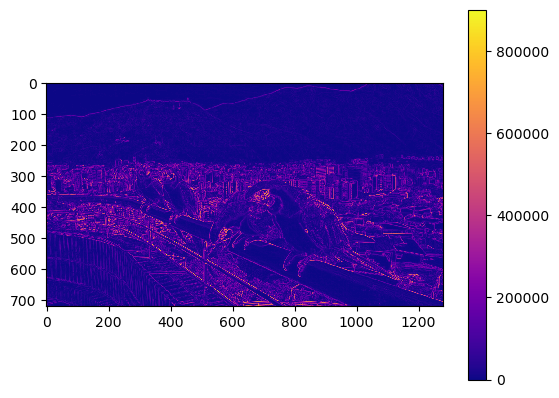

In [30]:
test_energy_map_2 = energy_image(ccs)
plt.imshow(test_energy_map_2, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

**Writing cumulative_minimum_energy_map()**

Using dynamic programming for generating a vertical seam the first step is to traverse the image from the second row to the last row and compute the cumulative minimum energy M for all possible connected seams for each pixel (i,j):

$$
M(i,j) = e(i,j) + min[M(i-1,j-1), M(i-1,j), M(i+1,j+1)]
$$

In [31]:
cumulative_energy_map = np.zeros_like(test_energy_map)

In [32]:
test_energy_map.shape

(1688, 3000)

In [33]:
cumulative_energy_map.shape

(1688, 3000)

In [34]:
row_size = test_energy_map.shape[0]
cols_size = test_energy_map.shape[1]

In [35]:
def cumulative_minimum_energy_map(energy_map: npt.NDArray[np.double],seam_direction: int=0) -> npt.NDArray[np.double]:
    """
    Computes the cumulative minimum energy map using dyamic programming as formulated by Avidan and Shamir in
    'Seam Carving for Content-Aware Image Resizing'
    source: http://graphics.cs.cmu.edu/courses/15-463/2012_fall/hw/proj3-seamcarving/imret.pdf
    
    Input:
        A single-channel image with the result of the energy function, expected format is a numpy array
        of data type double (float64)
        An integer indicating the direction of the desired seam. 0 traverses the image's rows
        and calculates a vertical seam. 1 traverses the image's columns and calculates an horizontal seam 
    Output:
        A 2D numpy array representing the minimum energy map. A numpy array of data type double (float64)
    
    Parameters
    ----------
    energy_map : np.ndarray [shape=(M,N)]
    direction : int

    Returns
    ----------
    cumulative_energy_map : np.ndarray [shape=(M,N)]

    Examples
    ----------
    >>> cumulative_minimum_energy_map(energy_map,0)
    >>>
    """
    assert len(energy_map.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert energy_map.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    assert seam_direction in [0,1], 'ValueError: specify a valid direction for the seam.\n==> 0 for a verical seam\n==> 1 for a horizontal seam'
    
    cumulative_energy_map = np.zeros_like(energy_map)
    row_size = energy_map.shape[0]
    cols_size = energy_map.shape[1]
    
    if seam_direction == 0:
        
        # Setting the first row of the output equal to the first row of the energy map
        cumulative_energy_map[0,:] = energy_map[0,:]
        
        # Traversing the energy map across rows
        for i in range(1,row_size):
            for j in range(0,cols_size):
                if j == 0:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j],energy_map[i-1,j+1])
                elif j == (cols_size - 1):
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j-1],energy_map[i-1,j])
                else:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j-1],energy_map[i-1,j],energy_map[i-1,j+1])
        
    if seam_direction == 1:
        
        # Setting the first column of the output equal to the first rcolumn of the energy map
        cumulative_energy_map[:,0] = energy_map[:,0]
        
        # Traversing the energy map across colums
        for j in range(1,cols_size):
            for i in range(0,row_size):
                if i == 0:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i,j-1],energy_map[i+1,j-1])
                elif i == (row_size - 1):
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i,j-1],energy_map[i-1,j-1])
                else:
                    cumulative_energy_map[i,j] = energy_map[i,j] + min(energy_map[i-1,j-1],energy_map[i,j-1],energy_map[i+1,j-1])
    
    return cumulative_energy_map

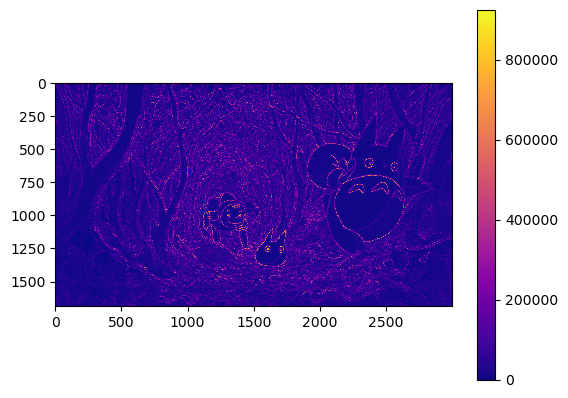

In [36]:
test_cumulative_energy_map_0 = cumulative_minimum_energy_map(test_energy_map,0)
plt.imshow(test_cumulative_energy_map_0, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

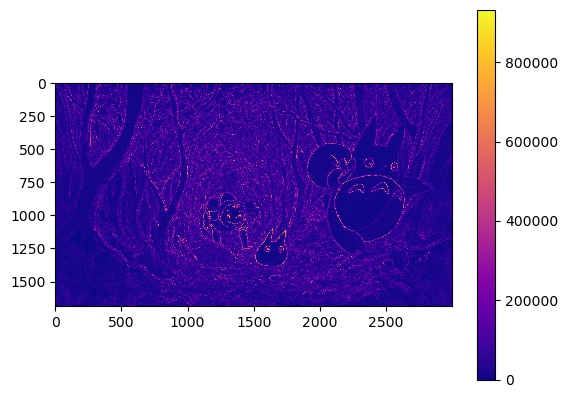

In [37]:
test_cumulative_energy_map_1 = cumulative_minimum_energy_map(test_energy_map,1)
plt.imshow(test_cumulative_energy_map_1, cmap='plasma', interpolation='none')
plt.colorbar()
plt.show()

In [38]:
test_cumulative_energy_map_0

array([[ 2304., 26802., 14436., ..., 10188., 15308.,  8960.],
       [ 3150., 24732., 26802., ..., 10548., 22246., 20324.],
       [ 5454., 12978., 22290., ..., 11646., 17256., 19044.],
       ...,
       [25956., 28260., 25548., ..., 81786., 81786., 75342.],
       [30564., 27414., 23458., ..., 46080., 33336., 46080.],
       [25110., 21348., 11520., ..., 18666., 20124., 18432.]])

In [39]:
test_cumulative_energy_map_1

array([[ 2304., 27648., 36864., ..., 12006., 24038., 22246.],
       [  846., 23274., 26568., ..., 10548., 21656., 19890.],
       [ 4608., 12978., 15534., ..., 11646., 16896., 16206.],
       ...,
       [12978., 28260., 28260., ..., 50688., 46080., 33336.],
       [17586., 25110., 21348., ..., 14058., 19278., 33480.],
       [10674., 21960., 12744., ..., 12132., 18198., 17352.]])

In [40]:
test_energy_map

array([[ 2304., 26802., 14436., ..., 10188., 15308.,  8960.],
       [  846., 22428., 14436., ...,  8730., 13286., 11364.],
       [ 4608., 12132.,  7854., ...,  8370.,  8526.,  7680.],
       ...,
       [12978., 15282., 13824., ..., 35784., 35784., 22428.],
       [17586., 14436., 10062., ..., 10296., 10908., 23652.],
       [10674., 11286.,  1458., ...,  8370.,  9828.,  7524.]])

**Writing find_optimal_vertical_seam()**

At the end of the process of finding the cumulative minimum energy map, the minimum value of the **last row** in the map will **indicate the end of the minimal connected vertical seam**. Hence, in the second step we backtrack from this minimum entry on the map to find the path of the optimal seam

In [41]:
np.argmin(np.array([1,2,3,0,5,6,7]))

3

In [42]:
a = np.arange(12).reshape(4,3)
a[1,1] = 0
a[2,2] = 0
a

array([[ 0,  1,  2],
       [ 3,  0,  5],
       [ 6,  7,  0],
       [ 9, 10, 11]])

In [43]:
np.argmin(a, axis=1)

array([0, 1, 2, 0], dtype=int64)

In [243]:
def find_optimal_vertical_seam(cum_energy_map: npt.NDArray[np.double]) -> npt.NDArray[np.double]:
    """
    Find the optimal vertical seam in a 2D array representing the cumulative minimum energy map
    
    Input:
        A single-channel cumulative minimum energy map of an image, expected format is a numpy array
        of data type double (float64)
    Output:
        A 1D numpy array containing the column indices of the pixels from the seam in each row.
        The selected pixels  minimum energy map. A numpy array of data type double (float64)
    
    Parameters
    ----------
    cum_energy_map : np.ndarray [shape=(M,N)]

    Returns
    ----------
    vertical_seam : np.ndarray [shape=(M,)]

    Examples
    ----------
    >>> find_optimal_vertical_seam_1(cum_energy_map)
    >>>
    """
    assert len(cum_energy_map.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert cum_energy_map.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    
    row_size, cols_size = cum_energy_map.shape
    
    # First look to the minimum value at the last row, the end of the seam
    first_minVal_indx = np.argmin(cum_energy_map[row_size-1,:])
    
    # Record the value of the first occurence of the minimum value
    first_minVal = cum_energy_map[row_size-1,first_minVal_indx]
    
    # Checking if the value occurs in other places in the last row
    occurences_minVal = np.count_nonzero(cum_energy_map[row_size-1,:] == first_minVal)
    
    # Checking if the minimumvalue is unique or not
    unique_minVal = not bool(occurences_minVal-1)
    
    if unique_minVal:
        
        # Create a vector to store the column indexes of the seam
        vertical_seam = np.zeros((row_size,),dtype=np.double)
        
        # Assigning column index value of the pixel with the minVal in the last row of the 
        # cumulative energy map to the seam-vector 
        vertical_seam[row_size-1] = first_minVal_indx
        
        # Filling the column indexes in the vector
        for i in range(row_size-2, -1, -1):
            upleft = int(vertical_seam[i+1]-1)
            upright = int(vertical_seam[i+1]+2)
            offset = -1
            
            ## Handling slices near the edges of the image ##
            if upleft < 0:
                upleft = 0
                offset = 0 # On the upper edge the offset need to change to 0
            if upright > (cols_size-1):
                upright = cols_size-1

            if (upleft == upright) and (upleft == 0):
                upright = upright + 2
                offset = 0 # On the upper edge the offset need to change to 0
            elif (upleft == upright) and (upright == cols_size-1):
                upleft = upleft - 2
            ## --------------------------------------------- ##
            
            vertical_seam[i] = vertical_seam[i+1] + np.argmin(cum_energy_map[i,upleft:upright]) + offset
    
    else:
        
        # Create a matrix to store the potential vectors in the columns. Each candidate vector column
        # stores the indexes of the candidate seam
        vertical_seam_matrix = np.zeros((row_size,occurences_minVal),dtype=np.double)
        
        # Finding column indexes of all cuurences of the min value
        index_list = np.where(cum_energy_map[row_size-1,:] == first_minVal)[0]
        
        # Assigning the column index values of the pixels with the minimun values 
        # in the last row cumulative energy map to the seam-vector matrix
        for j in range(vertical_seam_matrix.shape[1]):
            vertical_seam_matrix[row_size-1,j] = index_list[j]
        
        # Filling the matrix with column index values of each seam candidate
        for i in range(row_size-2, -1, -1):
            for j in range(vertical_seam_matrix.shape[1]):
                upleft = int(vertical_seam_matrix[i+1,j]-1)
                upright = int(vertical_seam_matrix[i+1,j]+2)
                offset = -1
                
                ## Handling slices near the edges of the image ##
                if upleft < 0:
                    upleft = 0
                    offset = 0 # On the upper edge the offset need to change to 0
                if upright > (cols_size-1):
                    upright = cols_size-1

                if (upleft == upright) and (upleft == 0):
                    upright = upright + 2
                    offset = 0 # On the upper edge the offset need to change to 0
                elif (upleft == upright) and (upright == cols_size-1):
                    upleft = upleft - 2
                ## --------------------------------------------- ##

                # The column index has to be connected to the pixel below, thus it moves either right, none, or left 
                # of the index below. argmin will output either 0, 1, 2 for left,none, or right. Substracting 1 shifts
                # this output to the left, so if there is no change then the index below will be the same M[i+1,j] + 0
                vertical_seam_matrix[i,j] = vertical_seam_matrix[i+1,j] + np.argmin(cum_energy_map[i,upleft:upright]) + offset
    
        # Finding the column with the minimum seam cost
        energy_values = np.zeros_like(vertical_seam_matrix)
        
        for i in range(energy_values.shape[0]):
            for j in range(energy_values.shape[1]):
                energy_values[i,j] = cum_energy_map[i,int(vertical_seam_matrix[i,j])]
        
        minimum_energy_column = np.argmin(np.sum(energy_values,axis=0))
        
        # Assigning the vertical seam vector
        vertical_seam = vertical_seam_matrix[:,minimum_energy_column]
        
    return vertical_seam

In [72]:
r,c = test_cumulative_energy_map_0.shape
a = np.zeros((r,),dtype=np.double)
a.shape

(1688,)

In [73]:
np.argmin(test_cumulative_energy_map_0[r-1,:])

191

In [74]:
b = test_cumulative_energy_map_0[r-1,191]
b

846.0

In [75]:
test_cumulative_energy_map_0[r-1,190:193]

array([3150.,  846.,  846.])

In [76]:
test_cumulative_energy_map_0[r-1,190:198]

array([3150.,  846.,  846., 3150., 4608., 2304., 4608., 9216.])

In [77]:
c = np.count_nonzero(test_cumulative_energy_map_0[r-1,:] == b)
c

2

In [78]:
f = np.where(test_cumulative_energy_map_0[r-1,:] == b)[0]
f
f[0]

191

In [79]:
a[r-1] = 42
a

array([ 0.,  0.,  0., ...,  0.,  0., 42.])

In [80]:
test_cumulative_energy_map_0[r-1,f[0]-1:f[0]+2]

array([3150.,  846.,  846.])

In [191]:
h = find_optimal_vertical_seam(test_cumulative_energy_map_0)
h

array([261., 261., 261., ..., 192., 191., 191.])

In [192]:
test_cumulative_energy_map_3 = test_cumulative_energy_map_0.copy()
test_cumulative_energy_map_3[r-1,192] = 847.0

In [193]:
test_cumulative_energy_map_0 is test_cumulative_energy_map_3

False

In [194]:
test_cumulative_energy_map_3[r-1,190:193]

array([3150.,  846.,  847.])

In [195]:
np.argmin(test_cumulative_energy_map_3[r-1,:])

191

In [196]:
i = find_optimal_vertical_seam(test_cumulative_energy_map_3)
i

array([261., 261., 261., ..., 192., 191., 191.])

In [197]:
test_a = (h == i)
test_a

array([ True,  True,  True, ...,  True,  True,  True])

In [198]:
np.count_nonzero(test_a == True)

1688

**Writing find_optimal_horizontal_seam()**

In [252]:
def find_optimal_horizontal_seam(cum_energy_map:npt.NDArray[np.double]) -> npt.NDArray[np.double]:
    """
    Find the optimal horizontal seam in a 2D array representing the cumulative minimum energy map
    
    Input:
        A single-channel cumulative minimum energy map of an image, expected format is a numpy array
        of data type double (float64)
    Output:
        A 1D numpy array containing the row indices of the pixels from the seam in each column.
        The selected pixels  minimum energy map. A numpy array of data type double (float64)
    
    Parameters
    ----------
    cum_energy_map : np.ndarray [shape=(M,N)]

    Returns
    ----------
    vertical_seam : np.ndarray [shape=(N,)]

    Examples
    ----------
    >>> find_optimal_horizontal_seam_1(cum_energy_map)
    >>>
    """
    assert len(cum_energy_map.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert cum_energy_map.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    
    row_size, cols_size = cum_energy_map.shape
    
    # First look to the minimum value at the last column, the end of the horizontal seam
    first_minVal_indx = np.argmin(cum_energy_map[:,cols_size-1])

    # Record the value of the first occurence of the minimum value
    first_minVal = cum_energy_map[first_minVal_indx,cols_size-1]
    
    # Checking if the value occurs in other rows in the last column
    occurences_minVal = np.count_nonzero(cum_energy_map[:,cols_size-1] == first_minVal)

    # Checking if the minimumvalue is unique or not
    unique_minVal = not bool(occurences_minVal-1)
    
    if unique_minVal:

        # Create a vector to store the row indexes of the seam
        horizontal_seam = np.zeros((cols_size,),dtype=np.double)
        
        # Assigning row index value of the pixel with the minVal in the last column of the 
        # cumulative energy map to the seam-vector 
        horizontal_seam[cols_size-1] = first_minVal_indx
        
        # Filling the row indexes in the vector. Traverses from last column to first column
        for j in range(cols_size-2, -1, -1):
            leftup = int(horizontal_seam[j+1]-1)
            leftdown = int(horizontal_seam[j+1]+2)
            offset = -1
            
            ## Handling slices near the edges of the image ##
            if leftup < 0:
                leftup = 0
                offset = 0 # On the upper edge the offset need to change to 0
            if leftdown > (row_size-1):
                leftdown = row_size-1

            if (leftup == leftdown) and (leftup == 0):
                leftdown = leftdown + 2
                offset = 0 # On the upper edge the offset need to change to 0
            elif (leftup == leftdown) and (leftdown == row_size-1):
                leftup = leftup - 2
            ## --------------------------------------------- ##
            
            horizontal_seam[j] = horizontal_seam[j+1] + np.argmin(cum_energy_map[leftup:leftdown,j]) + offset
    
    else:

        # Create a matrix to store the potential vectors in the rows. Each candidate vector row
        # stores the indexes of the candidate seam
        horizontal_seam_matrix = np.zeros((occurences_minVal,cols_size),dtype=np.double)
        
        # Finding row indexes of all cuurences of the min value
        index_list = np.where(cum_energy_map[:,cols_size-1] == first_minVal)[0]
        
        # Assigning the row index values of the pixels with the minimun values 
        # in the last columnof the cumulative energy map to the seam-vector matrix
        for i in range(horizontal_seam_matrix.shape[0]):
            horizontal_seam_matrix[i,cols_size-1] = index_list[i]
        
        # Filling the matrix with the row index values of each seam candidate. Traversers from last column to first
        for i in range(horizontal_seam_matrix.shape[0]):
            for j in range(cols_size-2, -1, -1):
                leftup = int(horizontal_seam_matrix[i,j+1]-1)
                leftdown = int(horizontal_seam_matrix[i,j+1]+2)
                offset = -1
                
                ## Handling slices near the edges of the image ##
                if leftup < 0:
                    leftup = 0
                    offset = 0 # On the upper edge the offset need to change to 0
                if leftdown > (row_size-1):
                    leftdown = row_size-1
                    
                if (leftup == leftdown) and (leftup == 0):
                    leftdown = leftdown + 2
                    offset = 0 # On the upper edge the offset need to change to 0
                elif (leftup == leftdown) and (leftdown == row_size-1):
                    leftup = leftup - 2
                ## --------------------------------------------- ##

                # The row index has to be connected to the pixel on the left, thus it moves either up, none, or down 
                # of the index on the left. argmin will output either 0, 1, 2 for up, none, or down. Substracting offset shifts
                # this output, so if there is no change then the index to the left will be the same M[i,j+1] + 0
                horizontal_seam_matrix[i,j] = horizontal_seam_matrix[i,j+1] + np.argmin(cum_energy_map[leftup:leftdown,j]) + offset
    
        # Finding the row with the minimum seam cost
        energy_values = np.zeros_like(horizontal_seam_matrix)
        
        for i in range(energy_values.shape[0]):
            for j in range(energy_values.shape[1]):
                energy_values[i,j] = cum_energy_map[int(horizontal_seam_matrix[i,j]),j]
        
        minimum_energy_row = np.argmin(np.sum(energy_values,axis=1))
        
        # Assigning the vertical seam vector
        horizontal_seam = horizontal_seam_matrix[minimum_energy_row,:]
    
    return horizontal_seam

In [136]:
print(test_cumulative_energy_map_1.shape)
r, c = test_cumulative_energy_map_1.shape
a = np.argmin(test_cumulative_energy_map_1[:,c-1])
print(test_cumulative_energy_map_1[:,c-1])
min_a = test_cumulative_energy_map_1[a,c-1]
print(min_a)
a

(1688, 3000)
[22246. 19890. 16206. ... 33336. 33480. 17352.]
1536.0


314

In [137]:
test_cumulative_energy_map_1

array([[ 2304., 27648., 36864., ..., 12006., 24038., 22246.],
       [  846., 23274., 26568., ..., 10548., 21656., 19890.],
       [ 4608., 12978., 15534., ..., 11646., 16896., 16206.],
       ...,
       [12978., 28260., 28260., ..., 50688., 46080., 33336.],
       [17586., 25110., 21348., ..., 14058., 19278., 33480.],
       [10674., 21960., 12744., ..., 12132., 18198., 17352.]])

In [138]:
b = np.count_nonzero(test_cumulative_energy_map_1[:,c-1] == min_a)
b

1

In [139]:
test_cumulative_energy_map_1_2 = test_cumulative_energy_map_1.copy()
test_cumulative_energy_map_1_2[1,c-1] = min_a
test_cumulative_energy_map_1_2[:5,:]

array([[ 2304., 27648., 36864., ..., 12006., 24038., 22246.],
       [  846., 23274., 26568., ..., 10548., 21656.,  1536.],
       [ 4608., 12978., 15534., ..., 11646., 16896., 16206.],
       [ 4530.,  9524.,  8434., ..., 13824., 16896., 13902.],
       [ 1844.,  6432.,  8758., ..., 16128., 17742., 16206.]])

In [140]:
c = np.count_nonzero(test_cumulative_energy_map_1_2[:,c-1] == min_a)
c

2

In [141]:
test_cumulative_energy_map_1_2.shape

(1688, 3000)

In [169]:
zz = find_optimal_horizontal_seam(test_cumulative_energy_map_1_2)

several mins branch


In [170]:
zz 

array([[ 42.,  42.,  41., ...,   1.,   2.,   1.],
       [327., 327., 328., ..., 315., 314., 314.]])

In [179]:
find_optimal_horizontal_seam(test_cumulative_energy_map_1)

unique branch


array([327., 327., 328., ..., 315., 314., 314.])

In [180]:
xx = zz[1,:] == find_optimal_horizontal_seam(test_cumulative_energy_map_1)
xx

unique branch


array([ True,  True,  True, ...,  True,  True,  True])

In [181]:
np.count_nonzero(xx==False)

0

**Writing display_seam()**

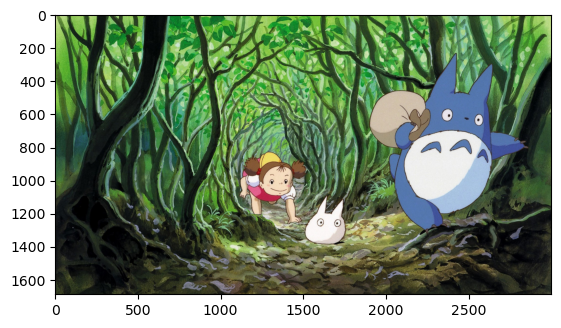

In [199]:
# Showing image used for the excercise
plt.imshow(totoro)
plt.show()

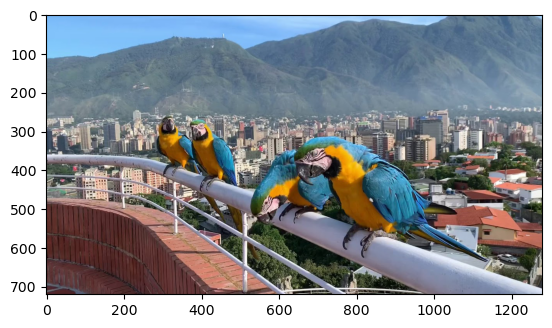

In [200]:
# Showing image used for the excercise
plt.imshow(ccs)
plt.show()

Generating energy maps of the images above

In [201]:
energy_map_totoro = energy_image(totoro)
energy_map_ccs = energy_image(ccs)

Generating cumulative maps, horizontal and vertical

In [204]:
cumulative_energy_map_rowTraverse_totoro = cumulative_minimum_energy_map(energy_map_totoro,0)
cumulative_energy_map_colTraverse_totoro = cumulative_minimum_energy_map(energy_map_totoro,1)

In [209]:
cumulative_energy_map_rowTraverse_ccs = cumulative_minimum_energy_map(energy_map_ccs,0)
cumulative_energy_map_colTraverse_ccs = cumulative_minimum_energy_map(energy_map_ccs,1)

Finding optimal seams for each image, horizontal and vertical

In [253]:
vertical_seam_totoro = find_optimal_vertical_seam(cumulative_energy_map_rowTraverse_totoro)
horizontal_seam_totoro = find_optimal_horizontal_seam(cumulative_energy_map_colTraverse_totoro)

In [254]:
vertical_seam_ccs = find_optimal_vertical_seam(cumulative_energy_map_rowTraverse_ccs)
horizontal_seam_ccs = find_optimal_horizontal_seam(cumulative_energy_map_colTraverse_ccs)

In [319]:
def display_seam(
    img: npt.NDArray[np.uint8], 
    seam_vector:npt.NDArray[np.double], 
    seam_direction: str
    ) -> matplotlib.figure.Figure:
    """
    Display the input image and plot the seam in the selected direction on top of it
    
    Input:
        An image with dimmensions MxNx3 of data type uint8,
        A 1D numpy array of data type double (float64) containing the row or column indices of the pixels from the seam, 
        An string indicating the type of the seam: 'HORIZONTAL' or 'VERTICAL'
    Output:
        A plot of the image and the seam
    
    Parameters
    ----------
    img : np.ndarray [shape=(M,N,3), dtype=np.uint8]
    seam_vector : np.ndarray [shape=(M,), dtype=np.double] for seam_direction == 'VERTICAL'
                  np.ndarray [shape=(N,), dtype=np.double] for seam_direction == 'HORIZONTAL'
    seam_direction : 'HORIZONTAL' or 'VERTICAL'

    Returns
    ----------
    0

    Examples
    ----------
    >>> find_optimal_horizontal_seam_1(img, seam_vector,'VERTICAL')
    >>> 0
    """
    assert img.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert img.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    
    assert seam_vector.dtype == np.double, 'Expecting a numpy array of the data type double (float64)'
    assert seam_direction in ['HORIZONTAL','VERTICAL'], "Unexpected seam direction. Options: ['HORIZONTAL','VERTICAL']"
    
    if seam_direction == 'HORIZONTAL':
        flag = img.shape[1] == len(seam_vector)
        if flag == False:
            ValueError("The length of the seam_vector does not match the number of columns in img") 
        
        # Creating the seam line
        xx = np.arange(0, img.shape[1], 1, dtype=np.double)
        yy = seam_vector
        
        # Display the image and plots the seam line on top of the image
        plt.imshow(img)
        plt.plot(xx, yy, color="white", linewidth=1) 
        #plt.axis('off') 
        plt.show() 
            
    elif seam_direction == 'VERTICAL':
        flag = img.shape[0] == len(seam_vector)
        if flag == False:
            ValueError("The length of the seam_vector does not match the number of rows in img")
        
        # Creating the seam line
        xx = seam_vector
        yy = np.arange(0, img.shape[0], 1, dtype=np.double)
        
        # Display the image and plots the seam line on top of the image
        plt.imshow(img)
        plt.plot(xx, yy, color="white", linewidth=1) 
        #plt.axis('off') 
        plt.show() 
    
    return 0

In [258]:
totoro.shape

(1688, 3000, 3)

In [267]:
f1 = totoro.shape[0] == len(vertical_seam_totoro)
f1

True

In [268]:
f2 = totoro.shape[1] == len(horizontal_seam_totoro)
f2

True

In [264]:
vertical_seam_totoro

array([261., 261., 261., ..., 192., 191., 191.])

In [270]:
len(np.arange(0, -totoro.shape[0], -1, dtype=np.double)) == len(vertical_seam_totoro)

True

In [316]:
xx = vertical_seam_totoro
yy = np.arange(0, totoro.shape[0], 1, dtype=np.double)

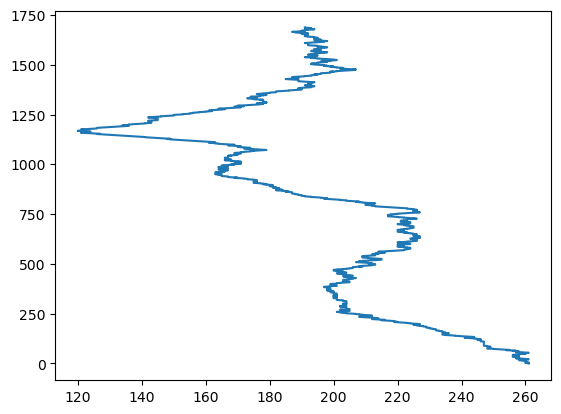

In [317]:
plt.plot(xx,yy)

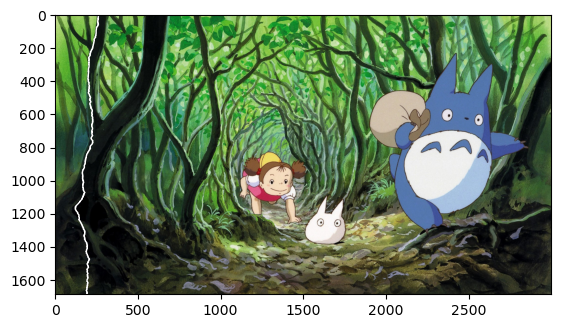

In [318]:
plt.imshow(totoro)
plt.plot(xx, yy, color="white", linewidth=1) 
#plt.axis('off') 
plt.show() 

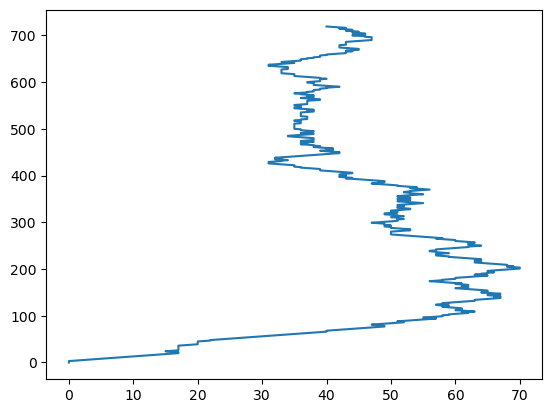

In [302]:
xx2 = vertical_seam_ccs
yy2 = np.arange(0, ccs.shape[0], 1, dtype=np.double)
plt.plot(xx2,yy2)

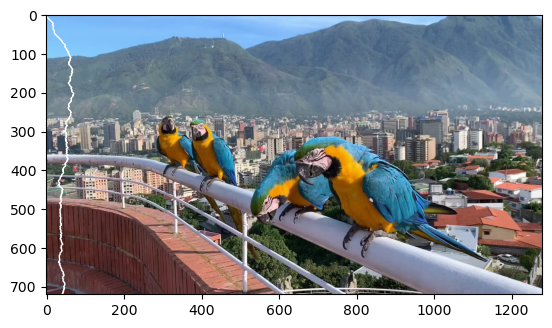

In [303]:
plt.imshow(ccs)
plt.plot(xx2, yy2, color="white", linewidth=1) 
#plt.axis('off') 
plt.show() 

In [305]:
# vertical_seam_ccs

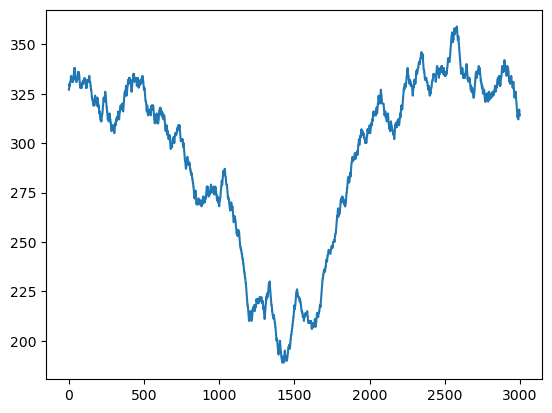

In [306]:
xx3 = np.arange(0, totoro.shape[1], 1, dtype=np.double)
yy3 = horizontal_seam_totoro
plt.plot(xx3,yy3)

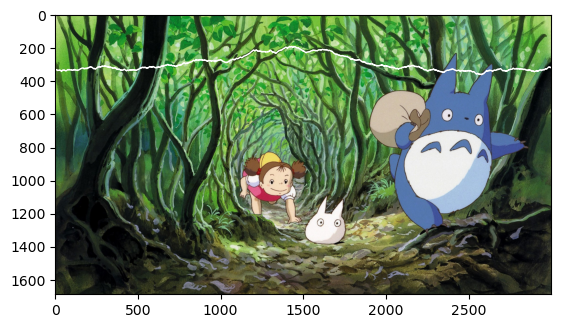

In [307]:
plt.imshow(totoro)
plt.plot(xx3, yy3, color="white", linewidth=1) 
plt.show() 

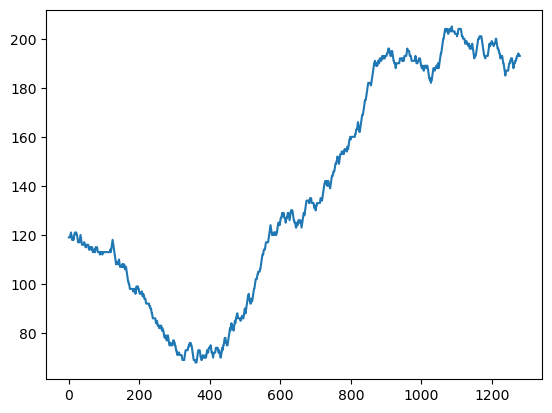

In [308]:
xx4 = np.arange(0, ccs.shape[1], 1, dtype=np.double)
yy4 = horizontal_seam_ccs
plt.plot(xx4,yy4)

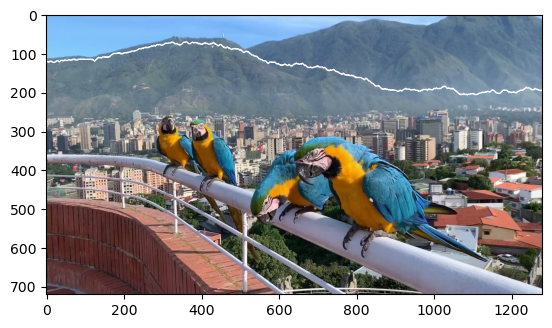

In [309]:
plt.imshow(ccs)
plt.plot(xx4, yy4, color="white", linewidth=1) 
plt.show() 

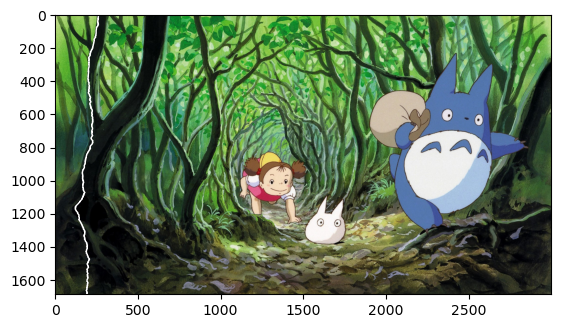

0

In [320]:
display_seam(totoro,vertical_seam_totoro,'VERTICAL')

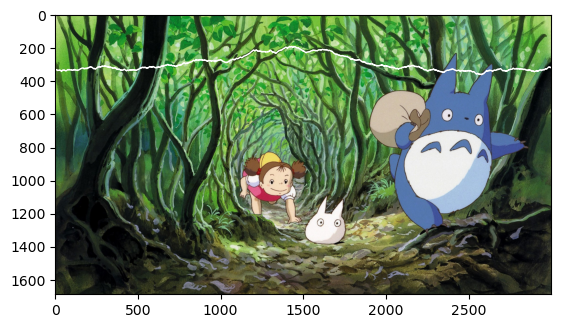

0

In [321]:
display_seam(totoro,horizontal_seam_totoro,'HORIZONTAL')

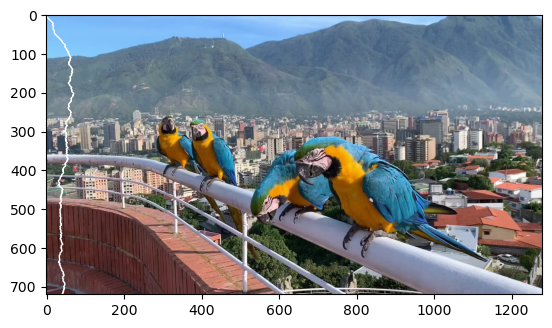

0

In [322]:
display_seam(ccs,vertical_seam_ccs,'VERTICAL')

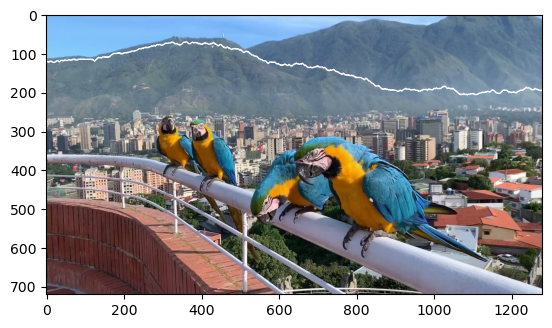

0

In [323]:
display_seam(ccs,horizontal_seam_ccs,'HORIZONTAL')

**Writing reduceWidth(img, energyImage) and reduceHeight(img, energyImage)**

In [327]:
def reduce_width(
    img: npt.NDArray[np.uint8], 
    energy_image: npt.NDArray[np.double], 
    ) -> Tuple[npt.NDArray[np.uint8],npt.NDArray[np.double]]:
    """
    Reduces the width on an image using seam-carving for content aware image resizing
    
    Input:
        An image with dimmensions [M,N,3] of data type uint8
        A single-channel image with the result of the energy function, expected format is a numpy array with
        dimmensions [M,N] of data type double (float64)
    Output:
        An image with dimmensions [M,N-1,3] of data type uint8
        A single-channel image with the result of the energy function, expected format is a numpy array with
        dimmensions [M,N-1] of data type double (float64)
    
    Parameters
    ----------
    img : np.ndarray [shape=(M,N,3), dtype=np.uint8]
    seam_vector : np.ndarray [shape=(M,N), dtype=np.double]

    Returns
    ----------
    Tuple[npt.NDArray[np.uint8],npt.NDArray[np.double]]

    Examples
    ----------
    >>> img_input.shape
    >>> (M,N,3)
    >>> img_output, energy_image_output = reduce_width(img_input, energy_image_input)
    >>> img_output.shape
    >>> (M,N-1,3)
    """
    assert img.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert img.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    
    assert len(energy_image.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert energy_image.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    
    assert (img.shape[0] == energy_image.shape[0]) and (img.shape[1] == energy_image.shape[1]), 'Image and Energy Image sizes must match'
    
    cum_energy_map_row_traverse = cumulative_minimum_energy_map(energy_image,0)
    vertical_seam_vector = find_optimal_vertical_seam(cum_energy_map_row_traverse)
    
    num_cols = img.shape[1] 
    num_rows = img.shape[0]
    
    # Creating a mask with same dimentions as image filled with True
    mask = np.ones((num_rows, num_cols), dtype=bool)
    
    # Changes values to false in each row combined with the address index stored in the vertical_seam vector
    for i in range(len(vertical_seam_vector)):
        mask[i,int(vertical_seam_vector[i])] = False
    
    # Stacks mask in 3D
    mask = np.stack([mask] * 3, axis=2)

    energy_out = 
    r_out =
    b_out =
    g_out =
    
    # cumulative_energy_map_rowTraverse_totoro = cumulative_minimum_energy_map(energy_map_totoro,0)
    # vertical_seam_totoro = find_optimal_vertical_seam(cumulative_energy_map_rowTraverse_totoro)
    # display_seam(totoro,vertical_seam_totoro,'VERTICAL')
    
    return 0

In [372]:
#1
test_energy_map = energy_image(totoro)

#2
test_cumulative_energy_map_row_traverse = cumulative_minimum_energy_map(test_energy_map,0)

#3
test_vertical_seam = find_optimal_vertical_seam(test_cumulative_energy_map_row_traverse)

In [391]:
#4 Create a mask

num_cols = totoro.shape[1] 
num_rows = totoro.shape[0]

test_mask = np.ones((num_rows, num_cols), dtype=bool)

print('Image dim: ',num_rows,num_cols)
print('Mask dim: ',test_mask.shape)
print('Vertical seam dim: ',len(test_vertical_seam))
print('Vertical seam has ',len(test_vertical_seam),' entries. One entry per row, each with a colum index')
print('Now modify the 1D mask to change value to False in the given row porition + column index')

for i in range(len(test_vertical_seam)):
    test_mask[i,int(test_vertical_seam[i])] = False

print('In column ',int(test_vertical_seam[0]),' of row 0 and column ',int(test_vertical_seam[-1]),' of the last row values should be False now')

print(test_mask[0,260:263])
print(test_mask[num_rows-1,190:193])

test_mask = np.stack([test_mask] * 3, axis=2)
print('RGB mask dim: ',test_mask.shape)

print(test_mask[0,260:263,2])
print(test_mask[num_rows-1,190:193,2])

Image dim:  1688 3000
Mask dim:  (1688, 3000)
Vertical seam dim:  1688
Vertical seam has  1688  entries. One entry per row, each with a colum index
Now modify the 1D mask to change value to False in the given row porition + column index
In column  261  of row 0 and column  191  of the last row values should be False now
[ True False  True]
[ True False  True]
RGB mask dim:  (1688, 3000, 3)
[ True False  True]
[ True False  True]


In [393]:
test_out_img = np.zeros((num_rows,num_cols-1))
test_out_energy = np.zeros((num_rows,num_cols-1))
test_out_img = np.stack([test_out_img] * 3, axis=2)
print('Dim of out image',test_out_img.shape)
print('Dim of out energy map',test_out_energy.shape)

Dim of out image (1688, 2999, 3)
Dim of out energy map (1688, 2999)


In [324]:
def reduce_height(
    img: npt.NDArray[np.uint8], 
    energy_image: npt.NDArray[np.double], 
    ) -> Tuple[npt.NDArray[np.uint8],npt.NDArray[np.double]]:
    """
    Reduces the height on an image using seam-carving for content aware image resizing
    
    Input:
        An image with dimmensions [M,N,3] of data type uint8
        A single-channel image with the result of the energy function, expected format is a numpy array with
        dimmensions [M,N] of data type double (float64)
    Output:
        An image with dimmensions [M-1,N,3] of data type uint8
        A single-channel image with the result of the energy function, expected format is a numpy array with
        dimmensions [M-1,N] of data type double (float64)
    
    Parameters
    ----------
    img : np.ndarray [shape=(M,N,3), dtype=np.uint8]
    seam_vector : np.ndarray [shape=(M,N), dtype=np.double]

    Returns
    ----------
    Tuple[npt.NDArray[np.uint8],npt.NDArray[np.double]]

    Examples
    ----------
    >>> img_input.shape
    >>> (M,N,3)
    >>> img_output, energy_image_output = reduce_height(img_input, energy_image_input)
    >>> img_output.shape
    >>> (M-1,N,3)
    """
    assert img.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert img.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    
    assert len(energy_image.shape) == 2, 'Unexpected number of dimensions. Expecting a 2d numpy array.'
    assert energy_image.dtype == np.double, 'Unexpedted dtype. The function expects a 2D energy map of data type double(float64).'
    
    assert (img.shape[0] == energy_image.shape[0]) and (img.shape[1] == energy_image.shape[1]), 'Image and Energy Image sizes must match'
    
    cum_energy_map_col_traverse = cumulative_minimum_energy_map(energy_image,1)
    horizontal_seam_vector = find_optimal_horizontal_seam(cum_energy_map_col_traverse)
    
    
    
    # cumulative_energy_map_colTraverse_totoro = cumulative_minimum_energy_map(energy_map_totoro,1)
    # horizontal_seam_totoro = find_optimal_horizontal_seam(cumulative_energy_map_colTraverse_totoro)
    # display_seam(totoro,horizontal_seam_totoro,'HORIZONTAL')
    
    return 0

In [ ]:
#Recap of the work above:

#1
energy_map_totoro = energy_image(totoro)

#2
cumulative_energy_map_rowTraverse_totoro = cumulative_minimum_energy_map(energy_map_totoro,0)
cumulative_energy_map_colTraverse_totoro = cumulative_minimum_energy_map(energy_map_totoro,1)

#3
vertical_seam_totoro = find_optimal_vertical_seam(cumulative_energy_map_rowTraverse_totoro)
horizontal_seam_totoro = find_optimal_horizontal_seam(cumulative_energy_map_colTraverse_totoro)

#4
display_seam(totoro,vertical_seam_totoro,'VERTICAL')
display_seam(totoro,horizontal_seam_totoro,'HORIZONTAL')

In [336]:
aa = np.arange(25).reshape((5,5))
aa

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [341]:
mask = np.eye(5,5)==0
mask

array([[False,  True,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [ True,  True, False,  True,  True],
       [ True,  True,  True, False,  True],
       [ True,  True,  True,  True, False]])

In [344]:
# This mask does not work
aa[mask].reshape((4,5))

array([[ 1,  2,  3,  4,  5],
       [ 7,  8,  9, 10, 11],
       [13, 14, 15, 16, 17],
       [19, 20, 21, 22, 23]])

In [346]:
bb = np.zeros((aa.shape[0]-1,aa.shape[1]))
bb

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [352]:
for j in range(bb.shape[1]):
    print(j)
    print(aa[:,j])
    print(mask[:,j])
    print(aa[:,j][mask[:,j]])
    bb[:,j] = aa[:,j][mask[:,j]]

0
[ 0  5 10 15 20]
[False  True  True  True  True]
[ 5 10 15 20]
1
[ 1  6 11 16 21]
[ True False  True  True  True]
[ 1 11 16 21]
2
[ 2  7 12 17 22]
[ True  True False  True  True]
[ 2  7 17 22]
3
[ 3  8 13 18 23]
[ True  True  True False  True]
[ 3  8 13 23]
4
[ 4  9 14 19 24]
[ True  True  True  True False]
[ 4  9 14 19]


In [353]:
bb

array([[ 5.,  1.,  2.,  3.,  4.],
       [10., 11.,  7.,  8.,  9.],
       [15., 16., 17., 13., 14.],
       [20., 21., 22., 23., 19.]])

In [354]:
aa

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [355]:
mask

array([[False,  True,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [ True,  True, False,  True,  True],
       [ True,  True,  True, False,  True],
       [ True,  True,  True,  True, False]])

In [356]:
cc = np.stack([aa] * 3, axis=2)
print(cc.shape)

(5, 5, 3)


In [358]:
cc[:,:,0]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [359]:
mask_rgb = np.stack([mask] * 3, axis=2)
mask_rgb.shape

(5, 5, 3)

In [360]:
dd = np.zeros((aa.shape[0]-1,aa.shape[1]))
dd = np.stack([dd] * 3, axis=2)
dd.shape

(4, 5, 3)

In [364]:
for k in range(dd.shape[2]):
    print('k => ',k)
    for j in range(dd.shape[1]):
        print('j -> ',j)
        print(cc[:,j,k])
        print(mask_rgb[:,j,k])
        print(cc[:,j,k][mask_rgb[:,j,k]])
        dd[:,j,k] = cc[:,j,k][mask_rgb[:,j,k]]

k =>  0
j ->  0
[ 0  5 10 15 20]
[False  True  True  True  True]
[ 5 10 15 20]
j ->  1
[ 1  6 11 16 21]
[ True False  True  True  True]
[ 1 11 16 21]
j ->  2
[ 2  7 12 17 22]
[ True  True False  True  True]
[ 2  7 17 22]
j ->  3
[ 3  8 13 18 23]
[ True  True  True False  True]
[ 3  8 13 23]
j ->  4
[ 4  9 14 19 24]
[ True  True  True  True False]
[ 4  9 14 19]
k =>  1
j ->  0
[ 0  5 10 15 20]
[False  True  True  True  True]
[ 5 10 15 20]
j ->  1
[ 1  6 11 16 21]
[ True False  True  True  True]
[ 1 11 16 21]
j ->  2
[ 2  7 12 17 22]
[ True  True False  True  True]
[ 2  7 17 22]
j ->  3
[ 3  8 13 18 23]
[ True  True  True False  True]
[ 3  8 13 23]
j ->  4
[ 4  9 14 19 24]
[ True  True  True  True False]
[ 4  9 14 19]
k =>  2
j ->  0
[ 0  5 10 15 20]
[False  True  True  True  True]
[ 5 10 15 20]
j ->  1
[ 1  6 11 16 21]
[ True False  True  True  True]
[ 1 11 16 21]
j ->  2
[ 2  7 12 17 22]
[ True  True False  True  True]
[ 2  7 17 22]
j ->  3
[ 3  8 13 18 23]
[ True  True  True False  Tr

In [367]:
cc[:,:,0],cc[:,:,1],cc[:,:,2]

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]),
 array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]),
 array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]))

In [368]:
dd[:,:,0],dd[:,:,1],dd[:,:,2]

(array([[ 5.,  1.,  2.,  3.,  4.],
        [10., 11.,  7.,  8.,  9.],
        [15., 16., 17., 13., 14.],
        [20., 21., 22., 23., 19.]]),
 array([[ 5.,  1.,  2.,  3.,  4.],
        [10., 11.,  7.,  8.,  9.],
        [15., 16., 17., 13., 14.],
        [20., 21., 22., 23., 19.]]),
 array([[ 5.,  1.,  2.,  3.,  4.],
        [10., 11.,  7.,  8.,  9.],
        [15., 16., 17., 13., 14.],
        [20., 21., 22., 23., 19.]]))

In [370]:
mm = np.ones((3, 3), dtype=bool)
mm

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])